In [23]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd 
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
#reading the training set file
training = pd.read_csv(r'training.csv', header = 0)
display(training)

,A,B,C,D,E,OUTPUT
0,1,1,1,0,0,1
1,1,1,1,0,1,1
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,1,0,0,1
5,0,0,1,0,1,1
6,0,0,1,1,0,1
7,0,0,1,1,1,1
8,0,1,0,0,0,0
9,0,1,0,0,1,0


In [25]:
#splitting the training set into data and target
training_arr = training.values
data_input = training_arr[:,0:5]
data_output = training_arr[:,5]

# Splitting the data into a training set and a test set
testing_set_size = 0.2

input_train, input_test, output_train, output_test = train_test_split(
data_input, data_output, test_size=testing_set_size, random_state=0)


In [26]:
#creating the keras model with 2 hidden layers with 3 and 2 nodes on each
model = Sequential()
model.add(Dense(4, input_shape=(5,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:


# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fitting the model to the dataset we got
history = model.fit(input_train, output_train, validation_split=0.2, epochs=100,batch_size=5)

# evaluate the model and print out the accuracy 
_, accuracy = model.evaluate(input_test, output_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
3/3 [==============================] - 1s 162ms/step - loss: 0.6174 - accuracy: 0.6000 - val_loss: 0.5205 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6134 - accuracy: 0.7333 - val_loss: 0.5129 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6094 - accuracy: 0.7333 - val_loss: 0.5057 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6060 - accuracy: 0.7333 - val_loss: 0.4982 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6009 - accuracy: 0.7333 - val_loss: 0.4910 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5968 - accuracy: 0.7333 - val_loss: 0.4833 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5916 - accuracy: 0.7333 - val_loss: 0.4756 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

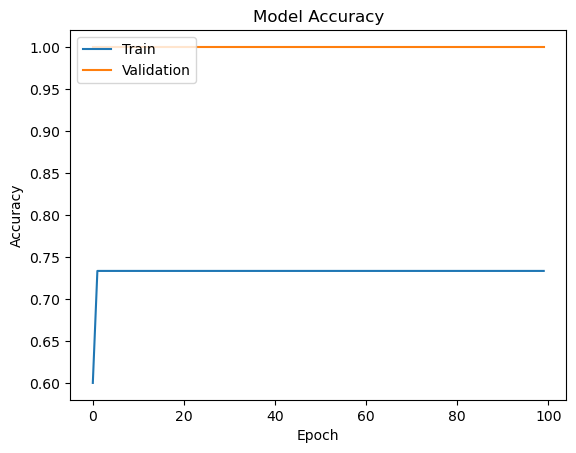

In [28]:
#ploting the accuracy of the training set and the validation set
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

In [29]:
#reading the testing set file
test = pd.read_csv(r'test.csv', header = 0)
display(test)

,A,B,C,D,E,OUTPUT
0,1,1,0,0,0,1
1,1,1,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,1,1,0,1,0,1
5,1,1,0,1,1,1
6,1,1,1,1,0,1
7,1,1,1,1,1,1


In [30]:
#splitting the training set into data and target
test_arr = test.values
test_input = test_arr[:,0:5]
test_output = test_arr[:,5]


# evaluate the keras model
_, accuracy = model.evaluate(test_input, test_output)
print('Accuracy: %.2f' % (accuracy*100))


1/1 [==============================] - 0s 28ms/step - loss: 0.3892 - accuracy: 0.7500
Accuracy: 75.00
